In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import gymnasium as gym

from dice_rl_TU_Vienna.plot.continuous import get_logs

from plugins.gymnasium.cartpole.config import *
from plugins.gymnasium.cartpole.load import *
from plugins.gymnasium.cartpole.plot import get_plot_logs

from utils.numpy import moving_average

/Users/richardweiss/Documents/.venvs/dice_rl_TU_Vienna/lib/python3.11/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Try loading model data/dice_rl/cartpole/policies/total_timesteps=10000
Try loading model data/dice_rl/cartpole/policies/total_timesteps=100000
data/dice_rl/cartpole/datasets/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/dataset-ctr.pkl


In [3]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_column", 100)

In [4]:
for k in K:
    x, y = get_get_policy_value_env(
        env=env,
        get_act=get_act[k],
        num_trajectory=num_trajectory,
        pad_rew=-1,
        verbosity=1,
    )

    get_policy_value[k] = x
    rewards[k] = y

100%|██████████| 500/500 [00:00<00:00, 669375.04it/s]


# Selected Plots

In [ ]:
algorithms = ["NeuralDualDice", "NeuralGradientDice", "NeuralGenDice"]
gammas = [0.1, 0.5, 0.9]

In [16]:
hparam_str_evaluation = {
    (0.1, "NeuralDualDice"): "gam0.1_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5",
    (0.5, "NeuralDualDice"): "gam0.5_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5",
    (0.9, "NeuralDualDice"): "gam0.9_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5",
    (0.1, "NeuralGradientDice"): "gam0.1_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0",
    (0.5, "NeuralGradientDice"): "gam0.5_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0",
    (0.9, "NeuralGradientDice"): "gam0.9_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0",
    (0.1, "NeuralGenDice"): "gam0.1_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0",
    (0.5, "NeuralGenDice"): "gam0.5_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0",
    (0.9, "NeuralGenDice"): None,
}

logs = {}
for algorithm in algorithms:
    for gamma in gammas:
        if hparam_str_evaluation[(gamma, algorithm)] is None: continue
        log_dir = os.path.join(outputs_dir, hparam_str_policy["e"], hparam_str_dataset, algorithm, hparam_str_evaluation[(gamma, algorithm)])
        logs[(gamma, algorithm)] = get_logs(log_dir)

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1732619303.MacBook-Pro-von-Richard.local.32919.0.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1732621407.MacBook-Pro-von-Richard.local.32919.1.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_batchs64_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1732623480.MacBook-Pro-von-Richard.local.32919.2.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/tot

In [ ]:
colors = ["green", "red", "cyan"]
alpha = 0.1
n_ma = 16

In [36]:
lr = {
    (0.1, "NeuralDualDice"): "5e-4",
    (0.5, "NeuralDualDice"): "5e-4",
    (0.9, "NeuralDualDice"): "1e-3",
    (0.1, "NeuralGradientDice"): "5e-4",
    (0.5, "NeuralGradientDice"): "1e-3",
    (0.9, "NeuralGradientDice"): "5e-4",
    (0.1, "NeuralGenDice"): "5e-4",
    (0.5, "NeuralGenDice"): "1e-4",
    (0.9, "NeuralGenDice"): None,
}

def plot(tag, baseline, gamma, suptitle, title, file_name, ylim, ylabel, ycompute, yscale):
    plt.plot()

    if baseline:
        plt.axhline(y=get_policy_value["b"](gamma), label="OnPE behavior",   color="black", linestyle="dashed")
        plt.axhline(y=get_policy_value["e"](gamma), label="OnPE evaluation", color="black", linestyle="dotted")

    for algorithm, color in zip(algorithms, colors):
        BL = [
            (0.9, "NeuralGenDice"),
        ]
        if (gamma, algorithm) in BL: continue

        x = np.array(logs[(gamma, algorithm)]["data"][tag]["steps"])
        y = np.array(logs[(gamma, algorithm)]["data"][tag]["values"])
        if ycompute is not None: y = ycompute(y)

        x_ma = x[n_ma-1:]
        y_ma = moving_average(y, n_ma)

        label = f"{algorithm}, lr={lr[(gamma, algorithm)]}"

        plt.plot(x, y, color=color, alpha=alpha)
        plt.plot(x_ma, y_ma, color=color, label=label, alpha=1)

    plt.ylim(ylim)

    plt.grid(linestyle=":")
    plt.legend()

    plt.xlabel("step")
    plt.ylabel(ylabel)

    if yscale == "pi":
        pi_ticks = np.arange(0, 3/16 * np.pi, 1/16 * np.pi)
        pi_labels = [r"$0$", r"$\frac{\pi}{16}$", r"$\frac{\pi}{8}$"]
        plt.yticks(pi_ticks, pi_labels)

    plt.suptitle(suptitle)
    plt.title(title)

    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path)

    plt.show()


def plot_pvs(weighted, gamma):
    tag = "pv_w" if weighted else "pv_s"
    baseline = True
    suptitle = "PVs - Cartpole"
    latex_gamma = r"\gamma"
    latex_lambda = r"\lambda"
    title = f"${latex_gamma}={gamma}, {latex_lambda}={1.0}$, weighted={weighted}"
    file_name = f"PVs_Cartpole_gamma={gamma}_lambda={1.0}_weighted={weighted}"
    ylim = (0, 1.1)
    ylabel = r"$\rho^\pi$"
    ycompute = None
    yscale = None
    plot(tag, baseline, gamma, suptitle, title, file_name, ylim, ylabel, ycompute, yscale)


def plot_bras(gamma):
    tag = "cos_angle"
    baseline = False
    suptitle = "BRAs - Cartpole"
    latex_gamma = r"\gamma"
    latex_lambda = r"\lambda"
    title = f"${latex_gamma}={gamma}, {latex_lambda}={1.0}$"
    file_name = f"BRAs_Cartpole_gamma={gamma}_lambda={1.0}"
    ylim = None
    ylabel = r"$\measuredangle ( \nabla P^\pi v, \nabla v )$"
    ycompute = np.arccos
    yscale = "pi"
    plot(tag, baseline, gamma, suptitle, title, file_name, ylim, ylabel, ycompute, yscale)

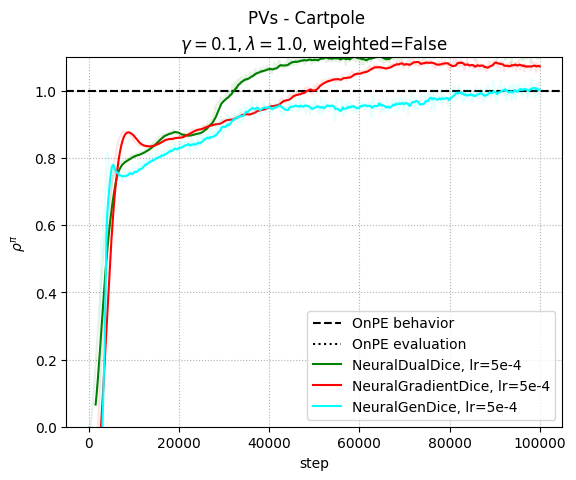

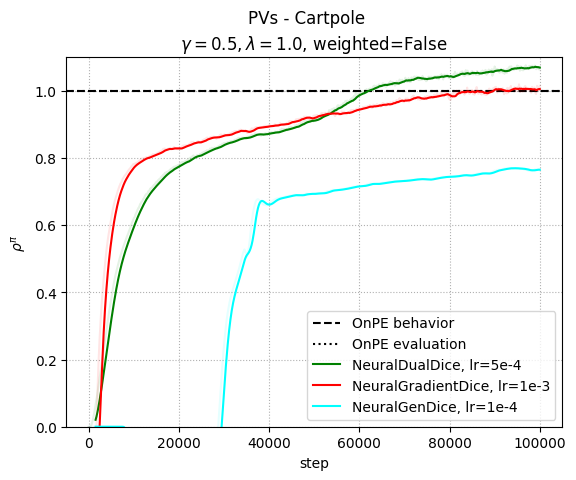

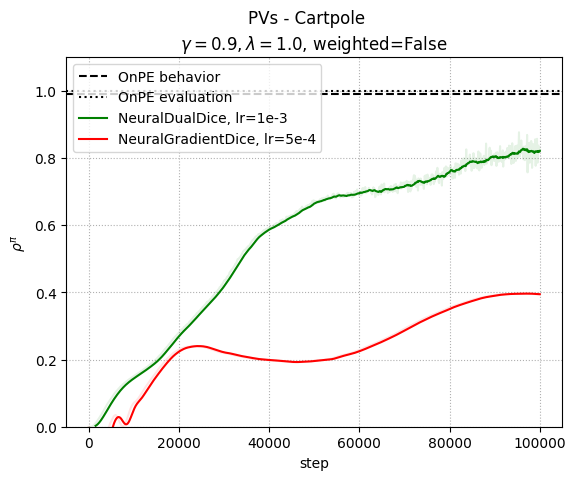

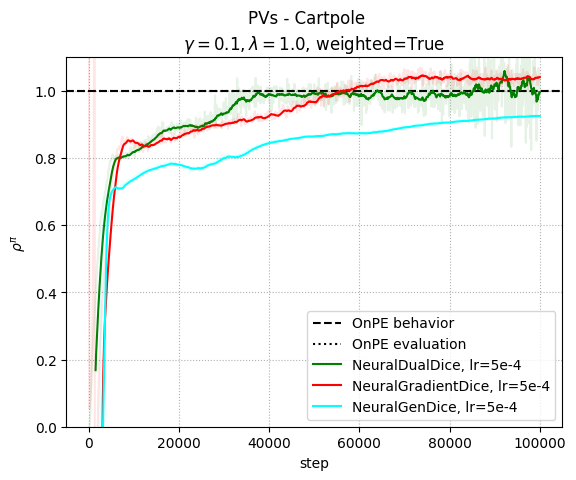

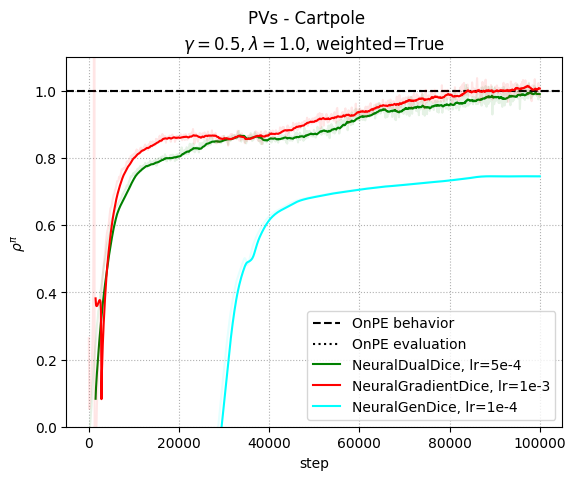

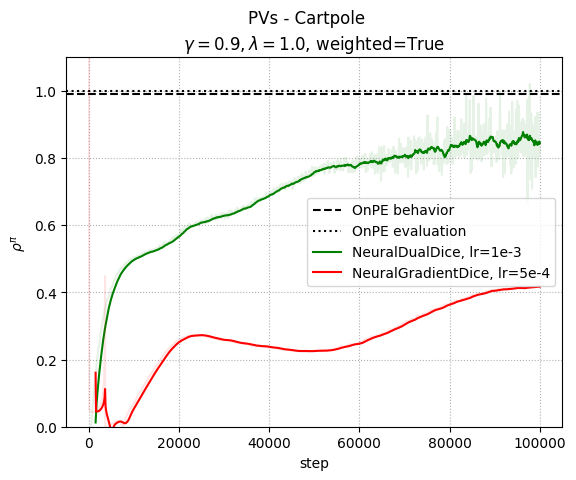

In [37]:
for weighted in [False, True]:
    for gamma in gammas:
        plot_pvs(weighted, gamma)

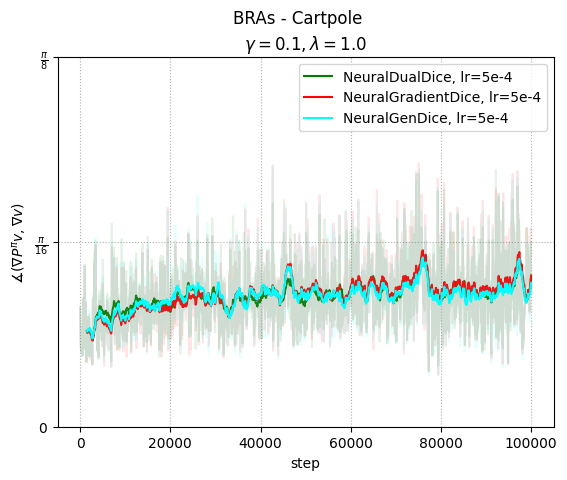

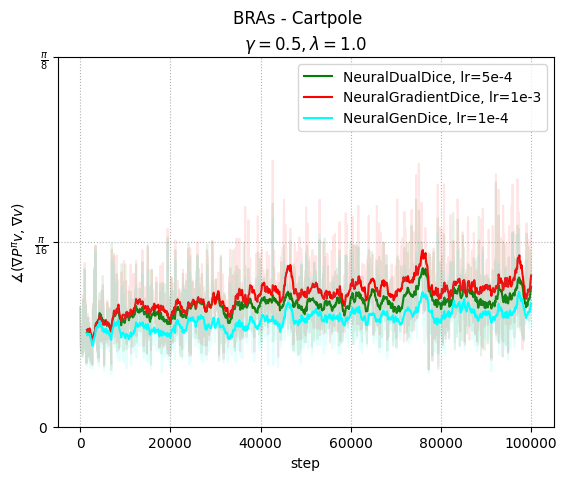

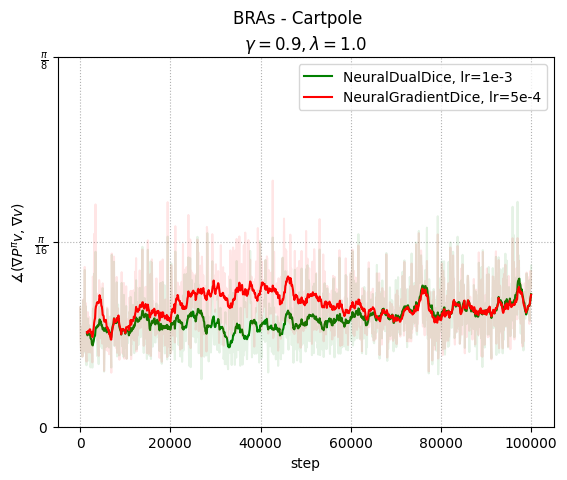

In [38]:
for gamma in gammas:
    plot_bras(gamma)

# All Plots

## All `num_steps=100_000`

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727337835.MacBook-Pro-von-Richard.local.68901.77.v2
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727338704.MacBook-Pro-von-Richard.local.68901.78.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727340549.MacBook-P

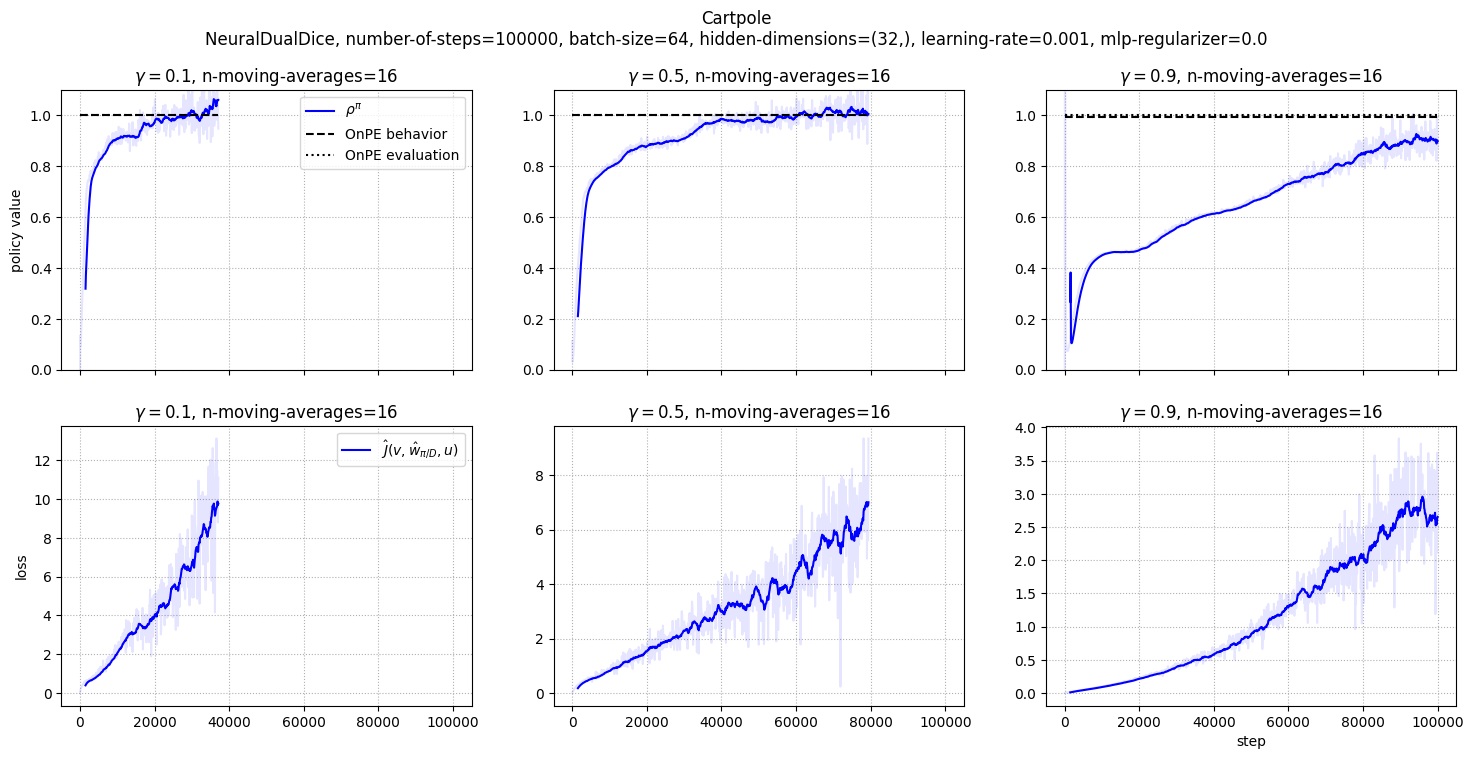

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727343636.MacBook-Pro-von-Richard.local.68901.80.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727346114.MacBook-Pro-von-Richard.local.68901.81.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727348602.MacBook-Pro-von-Richard.local.68901.82.v2


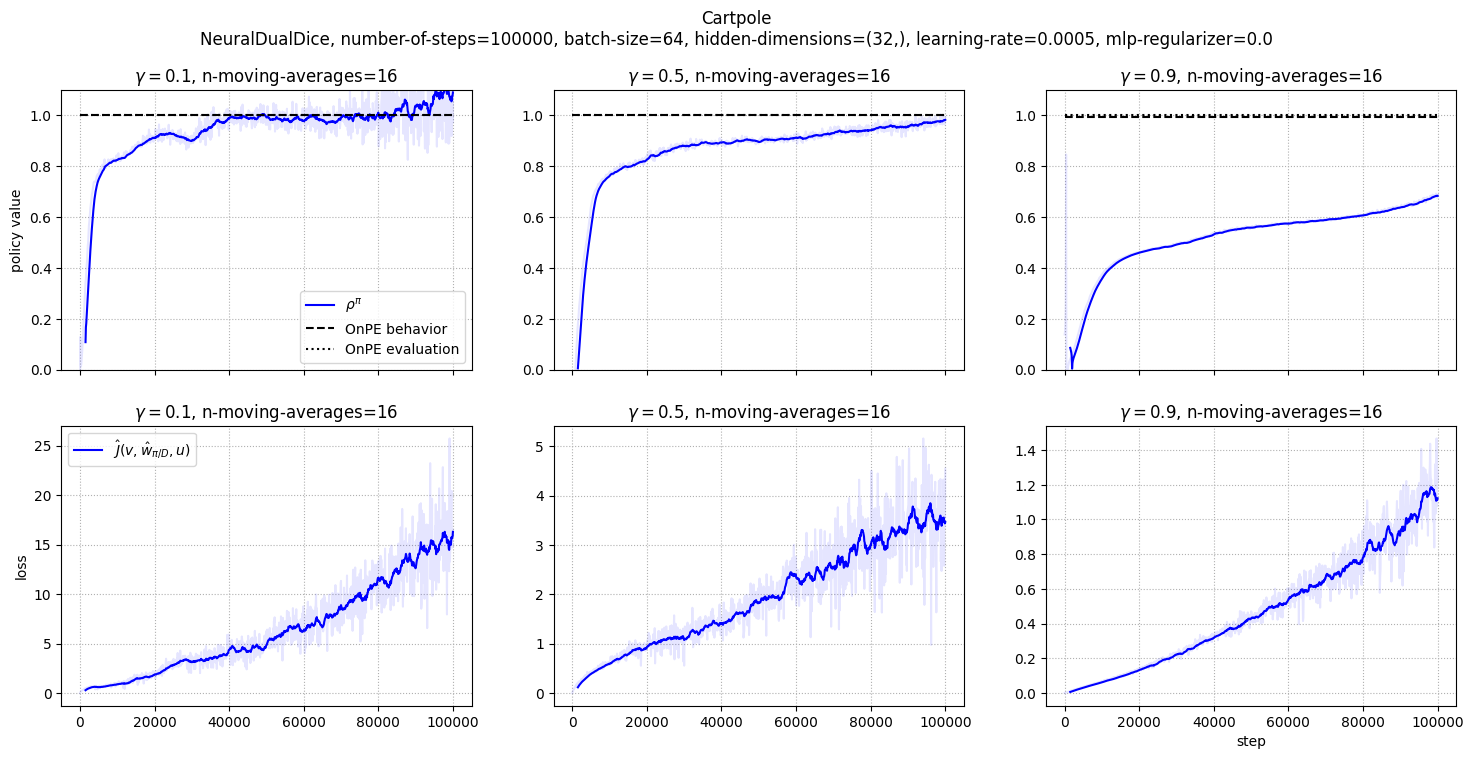

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727260618.MacBook-Pro-von-Richard.local.68901.72.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727263200.MacBook-Pro-von-Richard.local.68901.73.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1727265782.MacBook-Pro-von-Richard.local.68901.74.v2


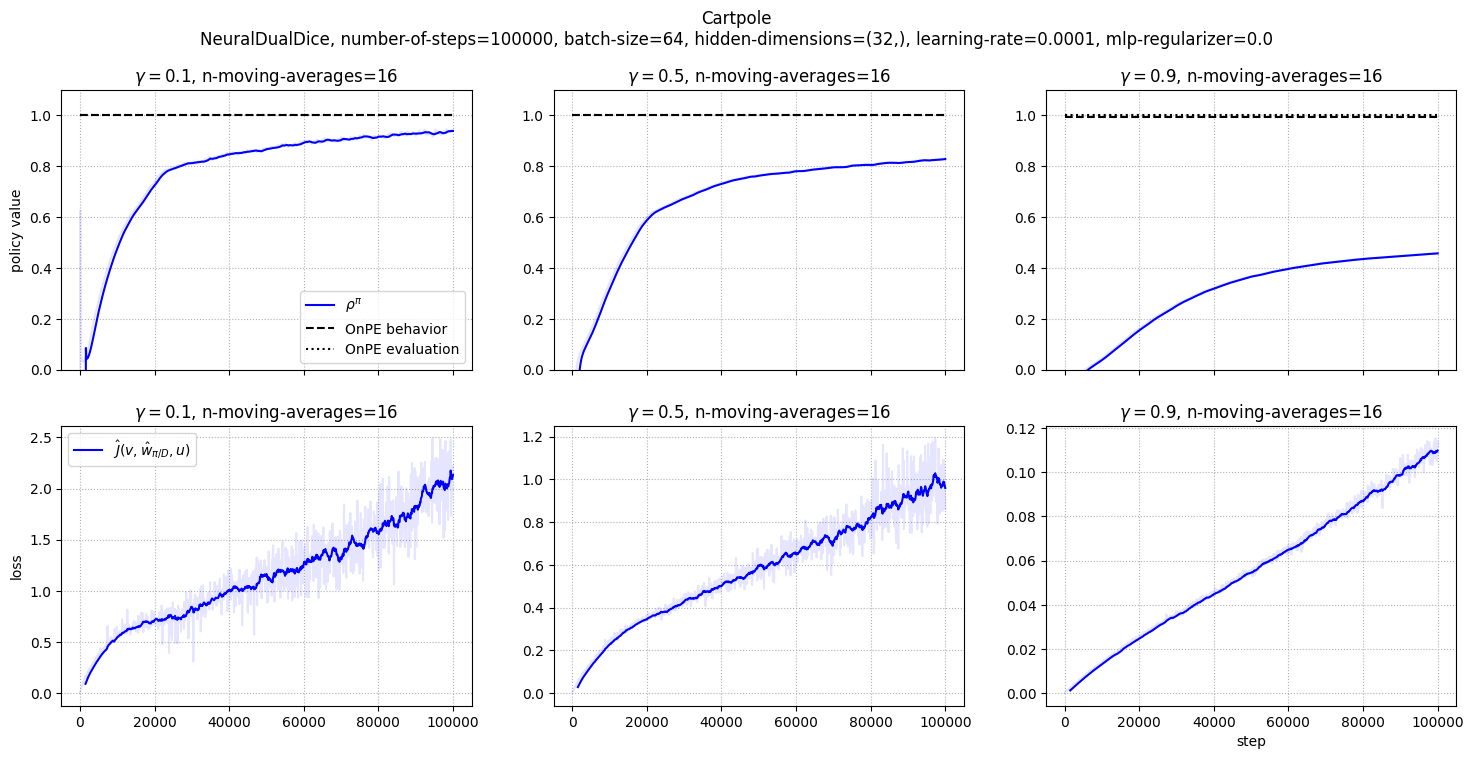

In [6]:
for lr in [0.001, 0.0005, 0.0001]:
    get_plot_logs(
        get_policy_value,
        #
        outputs_dir,
        hparam_str_policy["e"], hparam_str_dataset,
        "NeuralDualDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
                for gam in [0.1, 0.5, 0.9]
        ],
        #
        ylim_1=(0, 1.1),
        n_ma_1=16, n_ma_3=16,
        #
        save_dir=save_dir_images,
    )

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727393061.MacBook-Pro-von-Richard.local.68901.89.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727396012.MacBook-Pro-von-Richard.local.68901.90.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727396110.MacBook-Pro-von-Richard.local.68901.91.v2


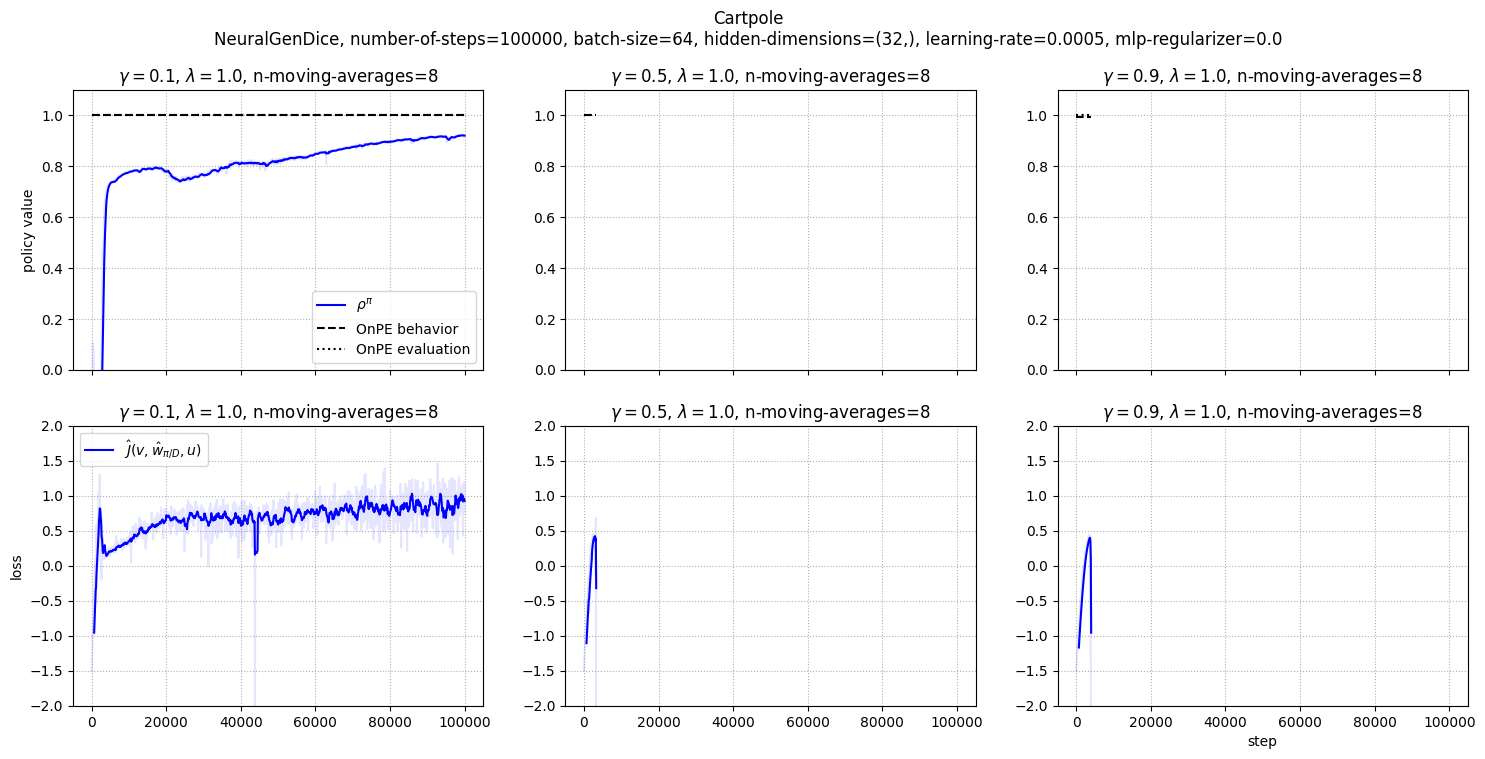

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727351790.MacBook-Pro-von-Richard.local.68901.83.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727355159.MacBook-Pro-von-Richard.local.68901.84.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727358227.MacBook-Pro-von-Richard.local.68901.85.v2


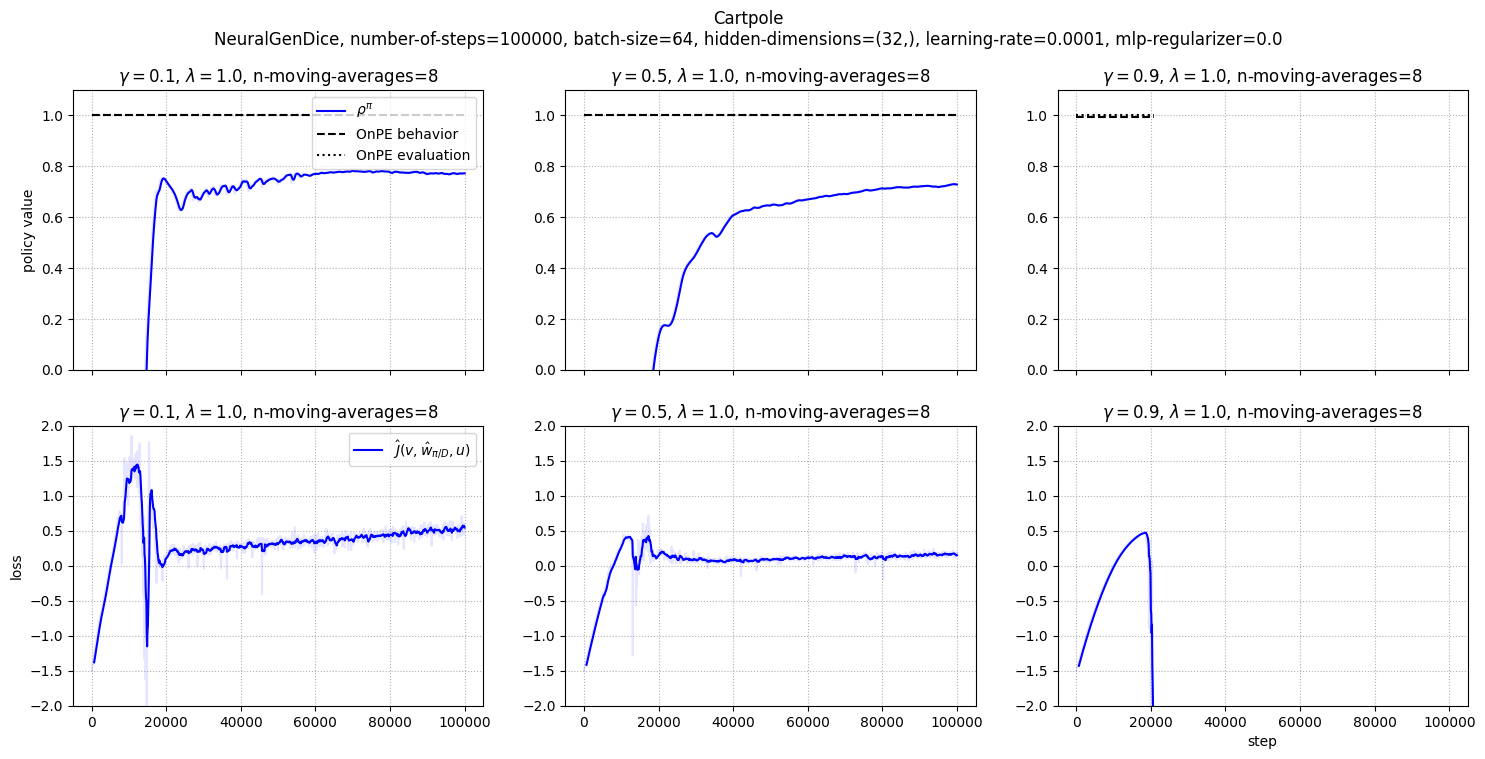

In [7]:
for lr in [0.0005, 0.0001]:
    get_plot_logs(
        get_policy_value,
        #
        outputs_dir,
        hparam_str_policy["e"], hparam_str_dataset,
        "NeuralGenDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        #
        ylim_1=(0, 1.1), ylim_3=(-2, 2),
        n_ma_1=8, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1727430516.MacBook-Pro-von-Richard.local.68901.95.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1727430673.MacBook-Pro-von-Richard.local.68901.96.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.01_lrd0.01_regp0.0_regd0.0_nlr0.01_nreg1.0/events.out.tfevents.1727433813.MacBook-Pro-von-Richard.local.68901.97.v2


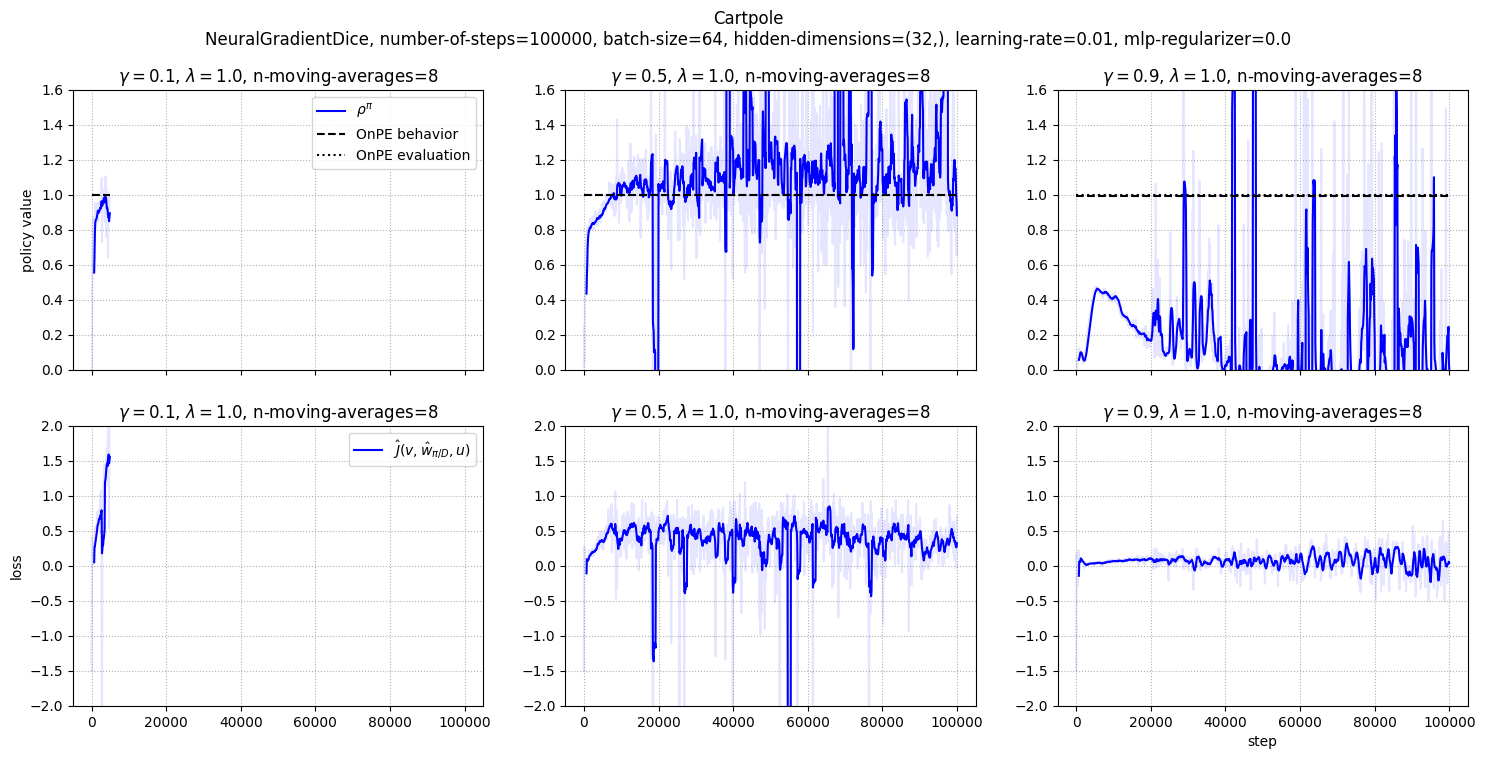

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1727358829.MacBook-Pro-von-Richard.local.68901.86.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1727361781.MacBook-Pro-von-Richard.local.68901.87.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1727364848.MacBook-Pro-von-Richard.local.68901.88.v2


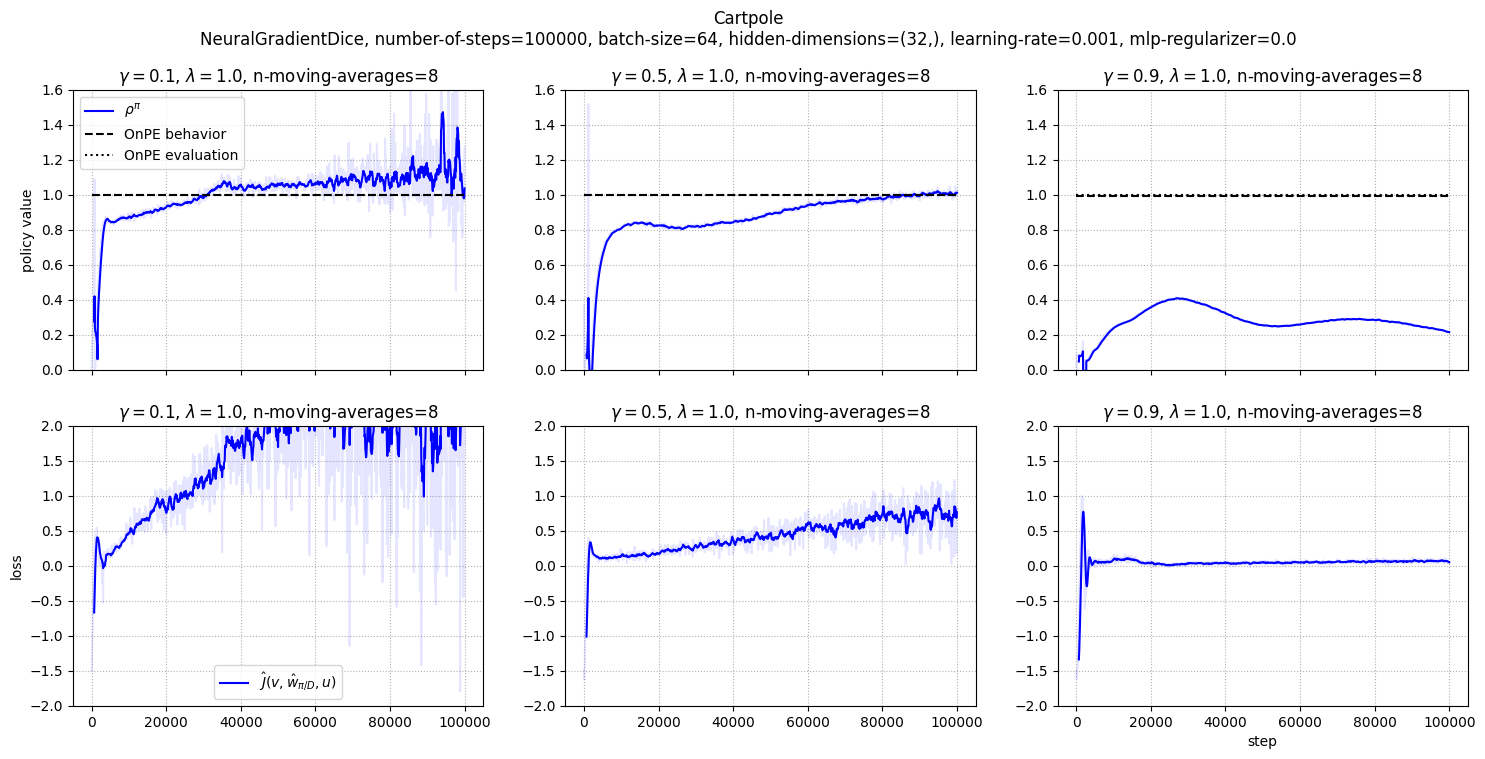

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727396229.MacBook-Pro-von-Richard.local.68901.92.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727399149.MacBook-Pro-von-Richard.local.68901.93.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1727402069.MacBook-Pro-von-Richard.local.68901.94.v2


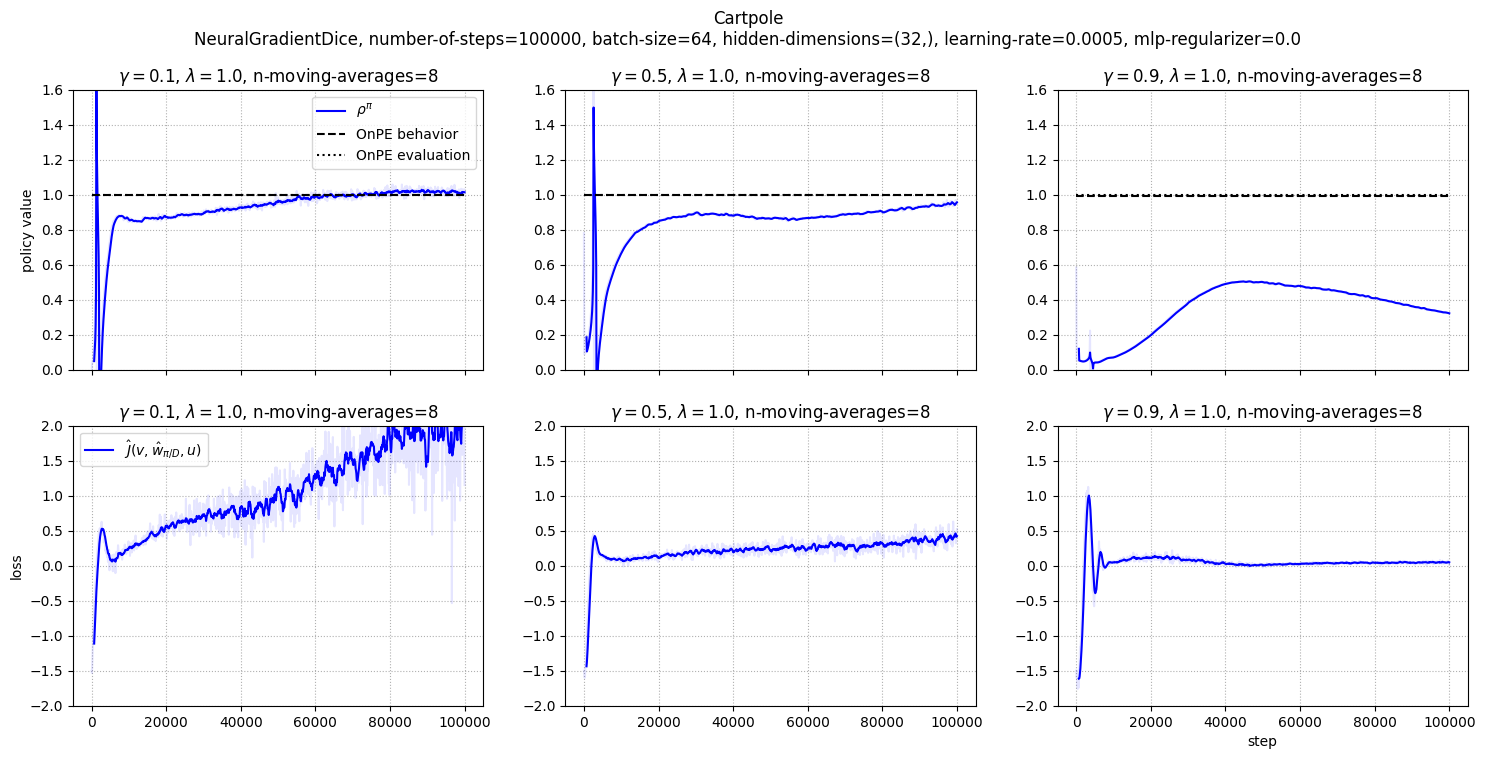

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727437621.MacBook-Pro-von-Richard.local.68901.98.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727445935.MacBook-Pro-von-Richard.local.68901.99.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1727450294.MacBook-Pro-von-Richard.local.68901.100.v2


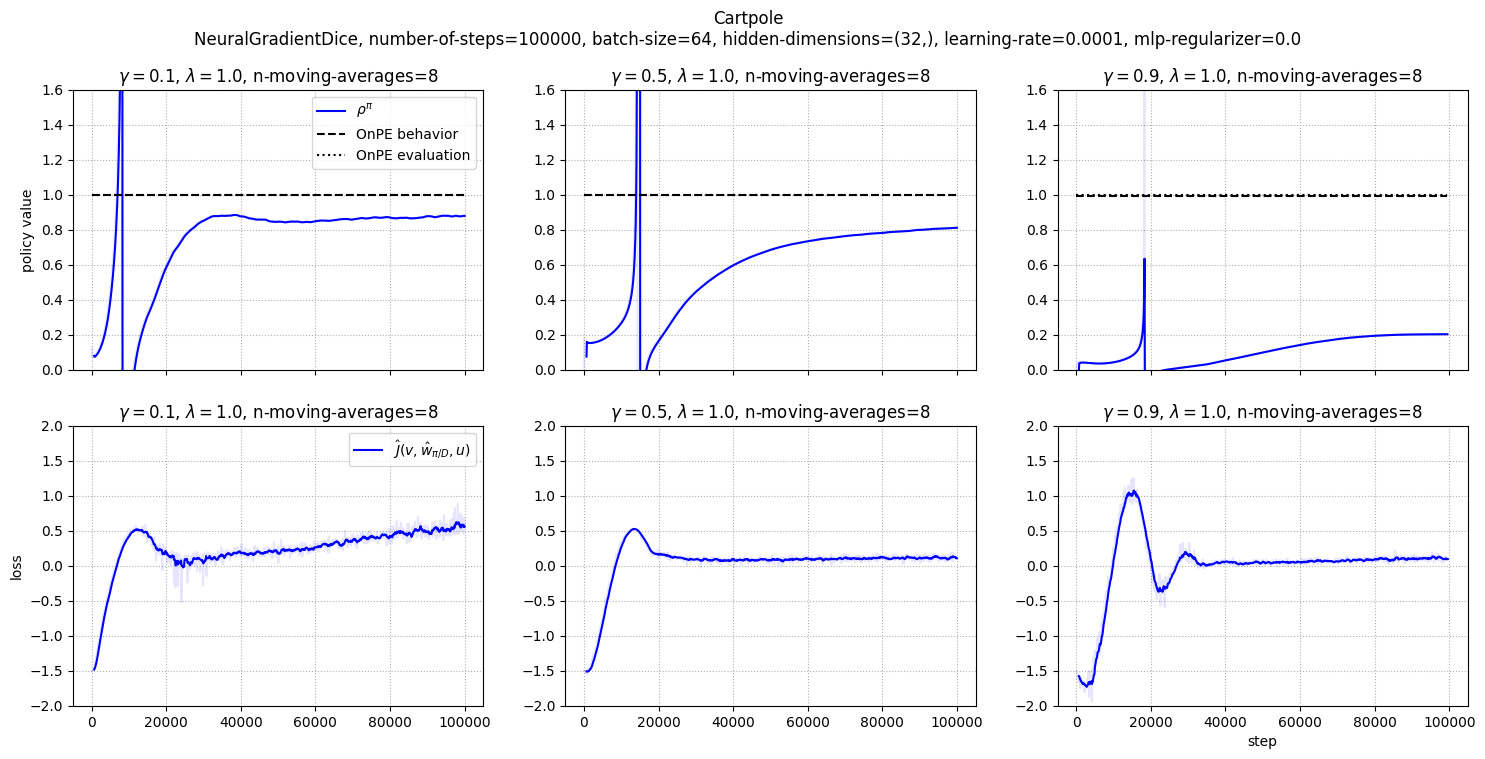

In [8]:
for lr in [0.01, 0.001, 0.0005, 0.0001]:
    get_plot_logs(
        get_policy_value,
        #
        outputs_dir,
        hparam_str_policy["e"], hparam_str_dataset,
        "NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs64_hdp(32,)_hdd(32,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        #
        ylim_1=(0, 1.6), ylim_3=(-2, 2),
        n_ma_1=8, n_ma_3=8,
        #
        save_dir=save_dir_images,
    )

## All `num_steps=250_000`

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1730023691.MacBook-Pro-von-Richard.local.48316.0.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1730029711.MacBook-Pro-von-Richard.local.48316.1.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1730035734.MacBook-Pro-von-Richard.local.48316.2.v2


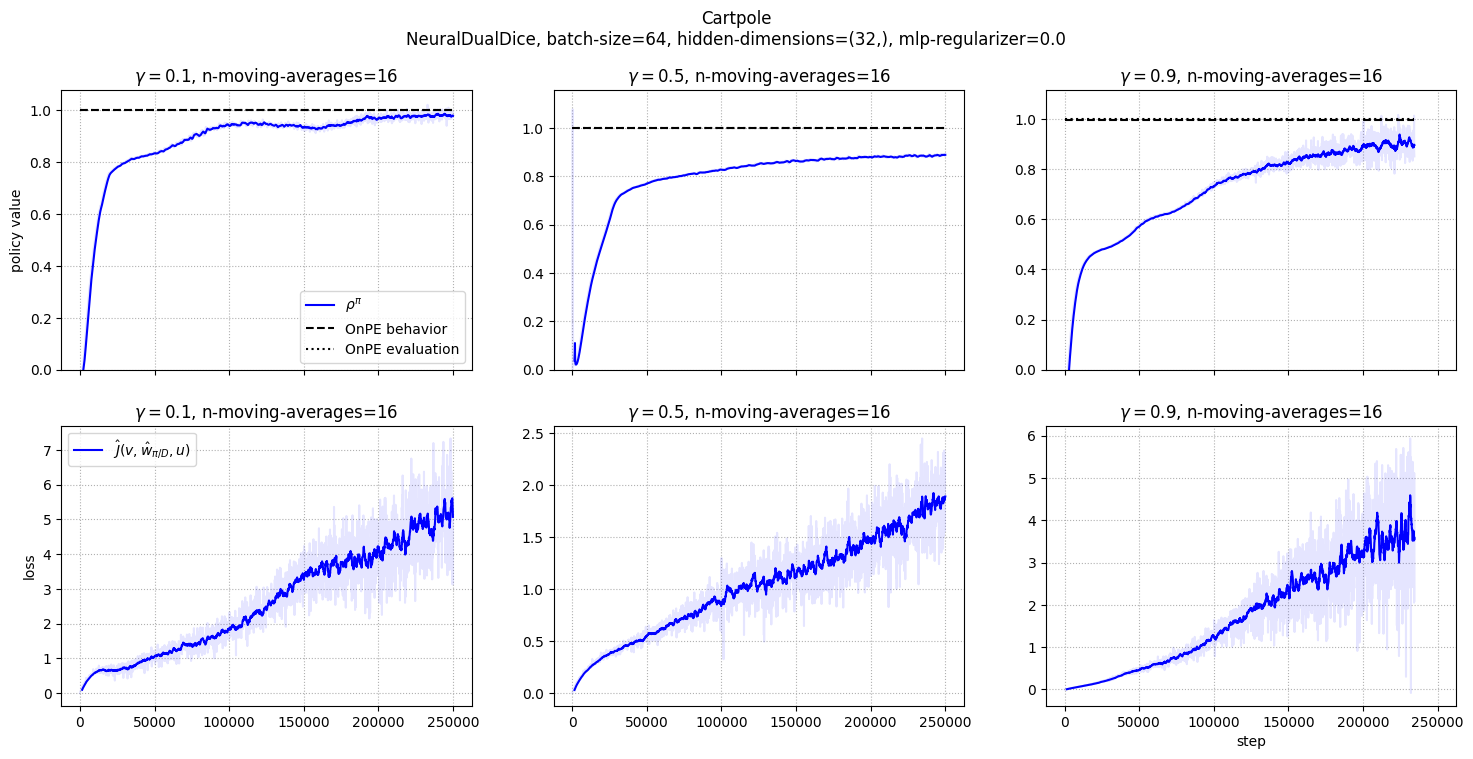

In [15]:
get_plot_logs(
    get_policy_value,
    #
    outputs_dir,
    hparam_str_policy["e"], hparam_str_dataset,
    "NeuralDualDice", hparam_str_evaluation=[
        "gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5",
        "gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5",
        "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_fexp1.5",
    ],
    #
    ylim_1=(0, None),
    n_ma_1=16, n_ma_3=16,
    hparams_title=["batch-size", "hidden-dimensions", "mlp-regularizer"],
)

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1730085291.MacBook-Pro-von-Richard.local.1617.3.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1730090570.MacBook-Pro-von-Richard.local.1617.4.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGenDice/gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730097864.MacBook-Pro-von-Richard.local.1617.5.v2


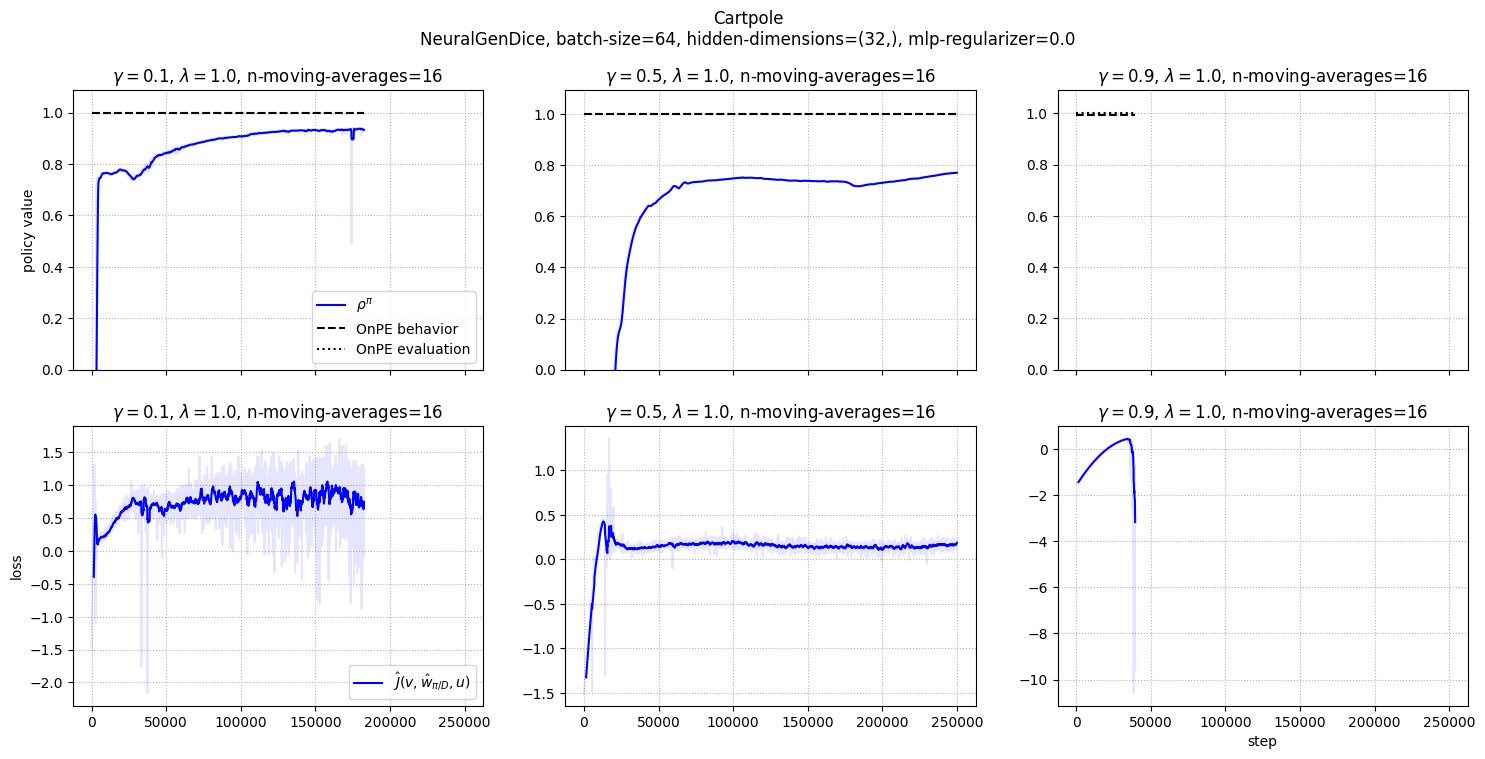

In [16]:
get_plot_logs(
    get_policy_value,
    #
    outputs_dir,
    hparam_str_policy["e"], hparam_str_dataset,
    "NeuralGenDice", hparam_str_evaluation=[
        "gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0",
        "gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0",
        "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0",
    ],
    #
    ylim_1=(0, None),
    n_ma_1=16, n_ma_3=16,
    hparams_title=["batch-size", "hidden-dimensions", "mlp-regularizer"],
)

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1730063617.MacBook-Pro-von-Richard.local.1617.0.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0/events.out.tfevents.1730070769.MacBook-Pro-von-Richard.local.1617.1.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0/events.out.tfevents.1730078011.MacBook-Pro-von-Richard.local.1617.2.v2


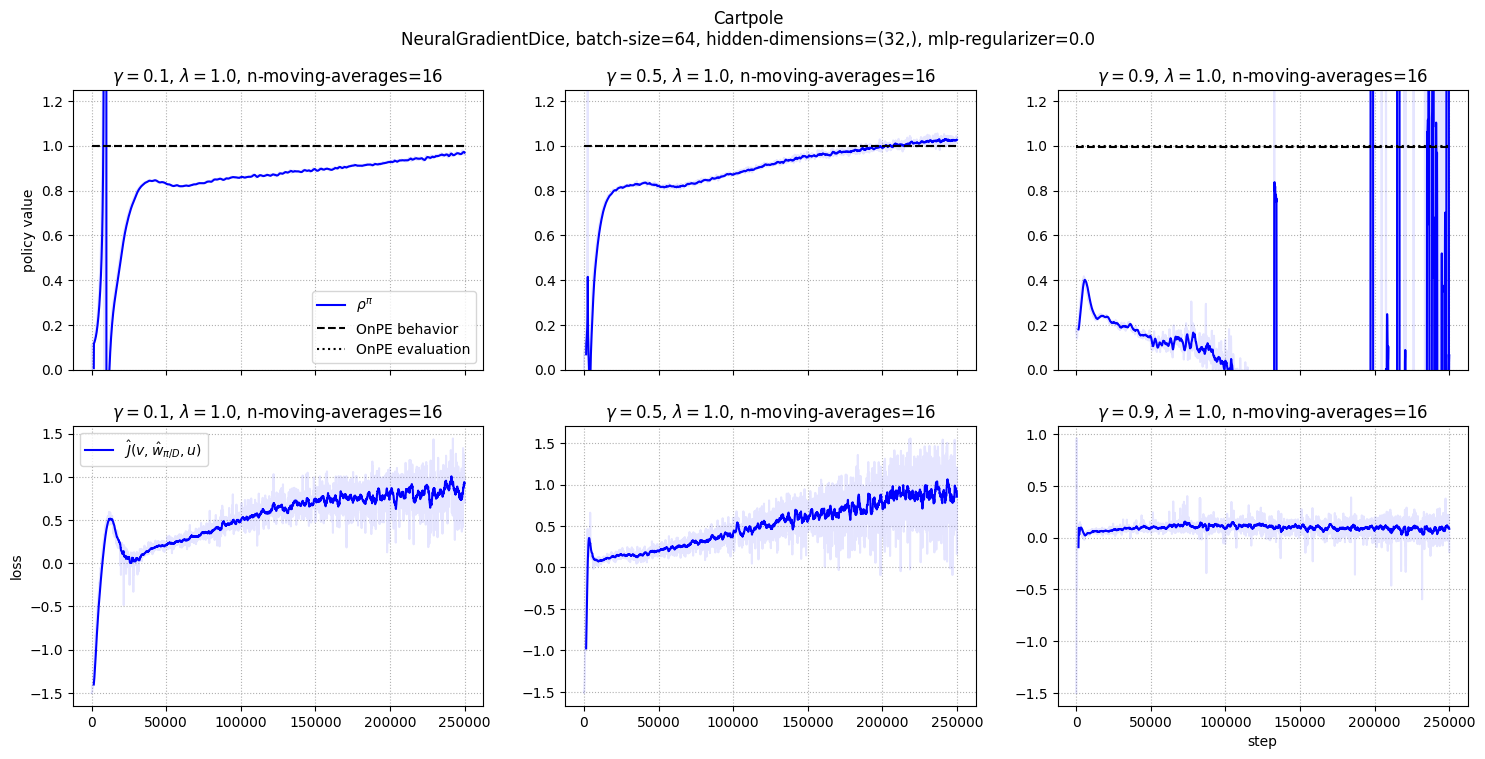

In [10]:
get_plot_logs(
    get_policy_value,
    #
    outputs_dir,
    hparam_str_policy["e"], hparam_str_dataset,
    "NeuralGradientDice", hparam_str_evaluation=[
        "gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0",
        "gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.0005_lrd0.0005_regp0.0_regd0.0_nlr0.0005_nreg1.0",
        "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrp0.005_lrd0.005_regp0.0_regd0.0_nlr0.005_nreg1.0",
    ],
    #
    ylim_1=(0, 1.25),
    n_ma_1=16, n_ma_3=16,
    #
    hparams_title=["batch-size", "hidden-dimensions", "mlp-regularizer"],
)

## `ExponentialDecay`

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.0005, 50000, 0.1, True)_lrdExpDec(0.0005, 50000, 0.1, True)_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1730114597.MacBook-Pro-von-Richard.local.29823.0.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 50000, 0.1, True)_lrdExpDec(0.001, 50000, 0.1, True)_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1730118963.MacBook-Pro-von-Richard.local.29823.1.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralDualDice/gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 100000, 0.5, False)_lrdExpDec(0.001, 100000, 0

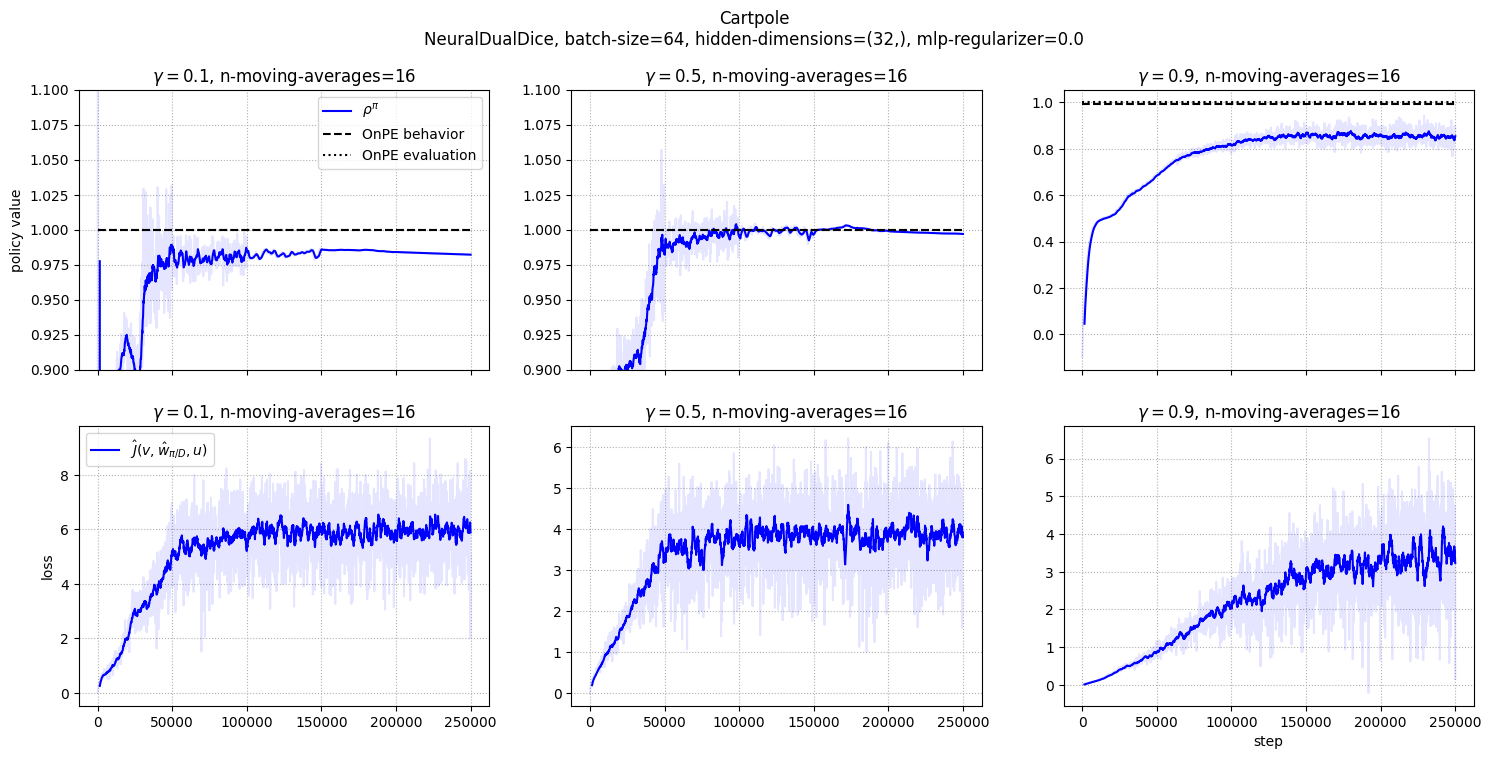

In [71]:
get_plot_logs(
    get_policy_value,
    #
    outputs_dir,
    hparam_str_policy["e"], hparam_str_dataset,
    "NeuralDualDice", hparam_str_evaluation=[
        "gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.0005, 50000, 0.1, True)_lrdExpDec(0.0005, 50000, 0.1, True)_regp0.0_regd0.0_fexp1.5",
        "gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 50000, 0.1, True)_lrdExpDec(0.001, 50000, 0.1, True)_regp0.0_regd0.0_fexp1.5",
        "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 100000, 0.5, False)_lrdExpDec(0.001, 100000, 0.5, False)_regp0.0_regd0.0_fexp1.5",
        # "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 100000, 0.5, True)_lrdExpDec(0.001, 100000, 0.5, True)_regp0.0_regd0.0_fexp1.5",
    ],
    #
    ylim_1=[(0.9, 1.1), (0.9, 1.1), None],
    n_ma_1=16, n_ma_3=16,
    hparams_title=["batch-size", "hidden-dimensions", "mlp-regularizer"],
)

Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 50000, 0.1, True)_lrdExpDec(0.001, 50000, 0.1, True)_regp0.0_regd0.0_nlrExpDec(0.001, 50000, 0.1, True)_nreg1.0/events.out.tfevents.1730123854.MacBook-Pro-von-Richard.local.31490.0.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.005, 50000, 0.1, False)_lrdExpDec(0.005, 50000, 0.1, False)_regp0.0_regd0.0_nlrExpDec(0.005, 50000, 0.1, False)_nreg1.0/events.out.tfevents.1730129224.MacBook-Pro-von-Richard.local.31490.1.v2
Getting log: data/dice_rl/cartpole/outputs/total_timesteps=100000/total_timesteps=10000_num_trajectory=500_max_trajectory_length=200_seed=0/NeuralGradientDice/gam0.9_nstep250000_batchs6

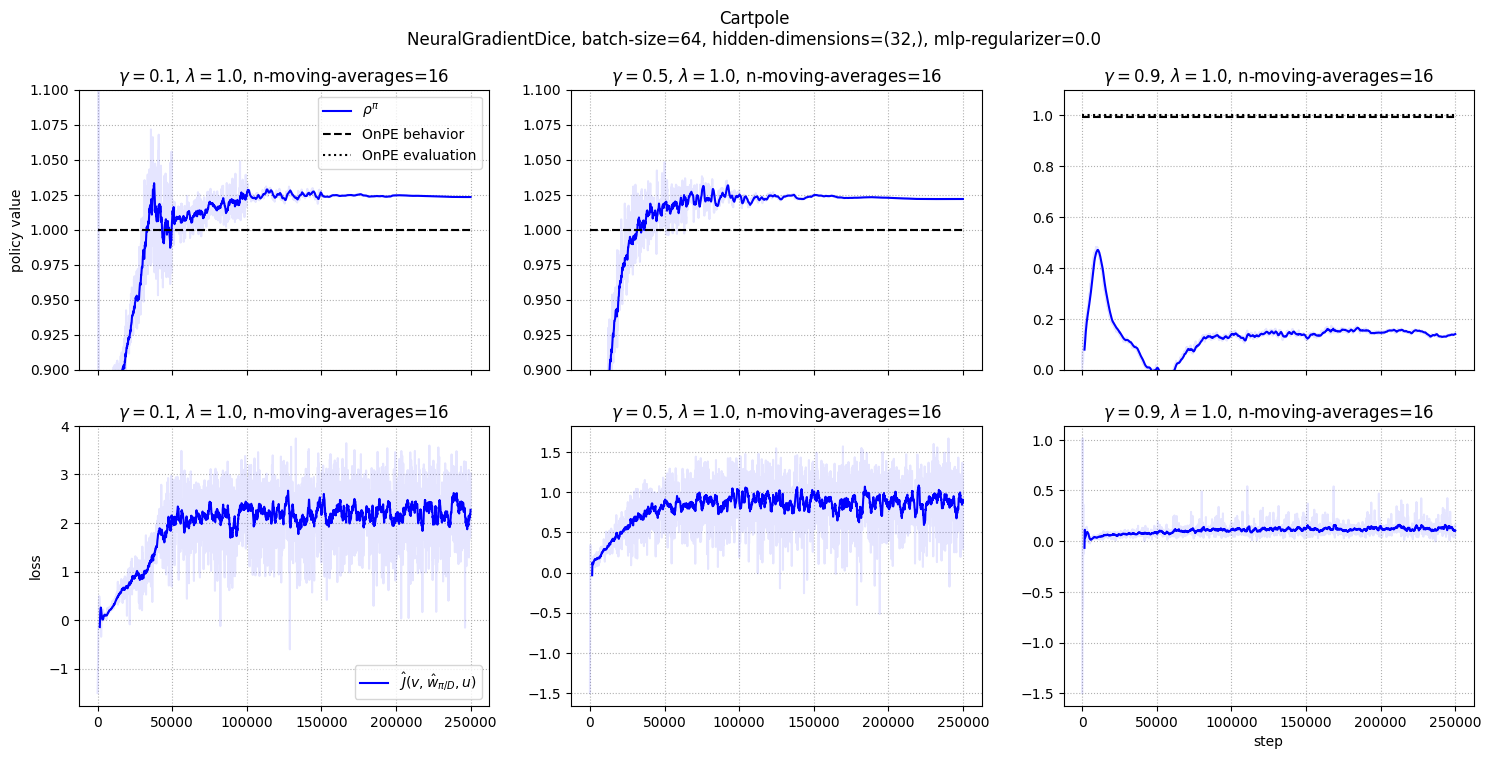

In [69]:
get_plot_logs(
    get_policy_value,
    #
    outputs_dir,
    hparam_str_policy["e"], hparam_str_dataset,
    "NeuralGradientDice", hparam_str_evaluation=[
        "gam0.1_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.001, 50000, 0.1, True)_lrdExpDec(0.001, 50000, 0.1, True)_regp0.0_regd0.0_nlrExpDec(0.001, 50000, 0.1, True)_nreg1.0",
        "gam0.5_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.005, 50000, 0.1, False)_lrdExpDec(0.005, 50000, 0.1, False)_regp0.0_regd0.0_nlrExpDec(0.005, 50000, 0.1, False)_nreg1.0",
        "gam0.9_nstep250000_batchs64_hdp(32,)_hdd(32,)_lrpExpDec(0.005, 50000, 0.5, False)_lrdExpDec(0.005, 50000, 0.5, False)_regp0.0_regd0.0_nlrExpDec(0.005, 50000, 0.5, False)_nreg1.0",
    ],
    #
    ylim_1=[(0.9, 1.1), (0.9, 1.1), (0, 1.1)],
    n_ma_1=16, n_ma_3=16,
    #
    hparams_title=["batch-size", "hidden-dimensions", "mlp-regularizer"],
)

# Test

In [12]:
for k in K:
    print(f"{names[k]} policy")

    for i in [-1, 1]:
        print(f"{i=}", end=": ")
        a = np.sum(rewards[k] == i)
        b = rewards[k].size
        print(a / b)

    print()

behavior policy
i=-1: 0.29512
i=1: 0.70488

evaluation policy
i=-1: 0.0
i=1: 1.0

